# spaCy 

spaCy is a free and open-source library for Natural Language Processing (NLP) in Python with a lot of in-built capabilities. * It’s becoming increasingly popular for processing and analyzing data in NLP.

### Install spaCy

#### conda
* conda install -c conda-forge spacy  
*https://anaconda.org/conda-forge/spacy
    
#### pip 
spaCy can be installed using pip, a Python package manager
* pip install spacy
* https://pypi.org/project/spacy/

### Download Models and Data

* spaCy has different types of models. The default model for the English language is en_core_web_sm.
* https://spacy.io/models

In [1]:
import spacy 

In [2]:
# download models and data for the English language:
import sys
!{sys.executable} -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-07-14 14:08:42.105128: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-07-14 14:08:42.105493: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Verify if the download was successful or not by loading it:
#If the nlp object is created, then it means that spaCy was installed and that models and data were successfully downloaded

nlp = spacy.load('en_core_web_sm')
# nlp refers to the language model loaded by en_core_web_sm.
nlp

### How to convert text  to an object(doc) that is understood by spaCy

In [4]:
text = ('A 12-week intensive training program on Artificial Intelligence and Machine Learning, taught to enthusiasts and prospective data scientist on the startup and corporate level.')
doc = nlp(text)
doc

A 12-week intensive training program on Artificial Intelligence and Machine Learning, taught to enthusiasts and prospective data scientist on the startup and corporate level.

### Wordcloud 

Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. 

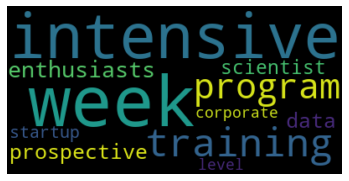

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

newText =''
for word in doc:
 if word.pos_ in ['ADJ', 'NOUN']:
  newText = " ".join((newText, word.text.lower()))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(newText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# Save the image in the img folder:
wordcloud.to_file("ADS.png")

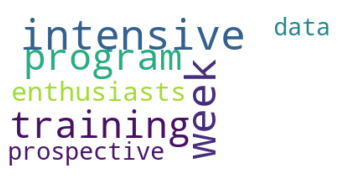

In [23]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=7, background_color="white").generate(newText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentence Detection

The process of locating the start and end of sentences in a given text.
* This allows you to you divide a text into linguistically meaningful units. You’ll use these units when you’re processing your text to perform tasks such as part of speech tagging and entity extraction.
* In spaCy, the sents property is used to extract sentences. 
    

In [5]:
# Here’s how you would extract the total number of sentences and the sentences for a given input text:
about_text = ("""When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!""")

#How to convert text to an object(doc) that is understood by spaCy
about_doc = nlp(about_text)

#  sents property is used to extract sentences.

sentences = list(about_doc.sents)
# print sentences
for sentence in sentences:
    print (sentence)

When learning data science, you shouldn't get discouraged!


Challenges and setbacks aren't failures, they're just part of the journey.
You've got this!


In [6]:
#paCy is correctly able to identify sentences in the English language, using a full stop(!) 
len(sentences)

4

### Tokenization

* breaks a text into meaningful units. These units are used for further analysis, like part of speech tagging.

In [7]:
# In spaCy, you can print tokens by iterating on the Doc object:

# Extract tokens for the given doc
print ([token.text for token in doc])

['A', '12', '-', 'week', 'intensive', 'training', 'program', 'on', 'Artificial', 'Intelligence', 'and', 'Machine', 'Learning', ',', 'taught', 'to', 'enthusiasts', 'and', 'prospective', 'data', 'scientist', 'on', 'the', 'startup', 'and', 'corporate', 'level', '.']


In [8]:
for token in about_doc:
    print (token, token.idx)

When 0
learning 5
data 14
science 19
, 26
you 28
should 32
n't 38
get 42
discouraged 46
! 57

 58
Challenges 59
and 70
setbacks 74
are 83
n't 86
failures 90
, 98
they 100
're 104
just 108
part 113
of 118
the 121
journey 125
. 132
You 134
've 137
got 141
this 145
! 149


### Stop Words

Stop words are words which are filtered out before or after processing of text.
* Most common words in a language. In the English language, some examples of stop words are the, are, but, and they. Most sentences need to contain stop words in order to be full sentences that make sense.
* Top words are removed because they aren’t significant and distort the word frequency analysis.
* SpaCy has a list of stop words for the English language:

In [9]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)

326

In [10]:
for stop_word in list(spacy_stopwords)[:10]:
    print(stop_word)

ca
not
as
whatever
top
nor
seem
yours
whose
namely


In [11]:
# You can remove stop words from the input text:
for token in about_doc:
     if not token.is_stop:
             print (token)

learning
data
science
,
discouraged
!


Challenges
setbacks
failures
,
journey
.
got
!


### Lemmatization

Lemmatization is the process of reducing inflected forms of a word while still ensuring that the reduced form belongs to the language. This reduced form or root word is called a lemma.

* For example, organizes, organized and organizing are all forms of organize. Here, organize is the lemma.
* Lemmatization is necessary because it helps you reduce the inflected forms of a word so that they can be analyzed as a single item. It can also help you normalize the text.

In [12]:
help_text=("Gus is helping organize a developer conference on Applications of Natural Language Processing. He keeps organizing local Python meetups and several internal talks at his workplace.")

In [13]:
help_doc = nlp(help_text)
for token in help_doc:
    print (token, token.lemma_)

Gus Gus
is be
helping helping
organize organize
a a
developer developer
conference conference
on on
Applications Applications
of of
Natural Natural
Language Language
Processing Processing
. .
He he
keeps keep
organizing organize
local local
Python Python
meetups meetup
and and
several several
internal internal
talks talk
at at
his his
workplace workplace
. .


* Organizing reduces to its lemma form organize. If you do not lemmatize the text, then organize and organizing will be counted as different tokens, even though they both have a similar meaning
* Lemmatization helps you avoid duplicate words that have similar meanings.

### Word Frequency

You can now convert a given text into tokens and perform statistical analysis over it
* his analysis can give you various insights about word patterns, such as common words or unique words in the text:

In [14]:
from collections import Counter

In [15]:
complete_text=('Since its founding, the company has hired several high-profile neuroscientists from various universities.[7] By July 2019, it had received $158 million in funding (of which $100 million was from Musk) and was employing a staff of 90 employees.[8] At that time, Neuralink announced that it was working on a "sewing machine-like" device capable of implanting very thin (4 to 6 μm in width[9]) threads into the brain, and demonstrated a system that read information from a lab rat via 1,500 electrodes. They had anticipated starting experiments with humans in 2020;[8] but have since moved that projection to 2021.[10]Several neuroscientists and publications, including the MIT Technology Review, have criticized some claims made by Musk in relation to the technolo')

In [16]:
complete_doc = nlp(complete_text)


# Remove stop words and punctuation symbols
words = [token.text for token in complete_doc
        if not token.is_stop and not token.is_punct]

In [17]:
word_freq = Counter(words)
print(word_freq)

Counter({'neuroscientists': 2, '$': 2, 'million': 2, 'Musk': 2, 'founding': 1, 'company': 1, 'hired': 1, 'high': 1, 'profile': 1, 'universities.[7': 1, 'July': 1, '2019': 1, 'received': 1, '158': 1, 'funding': 1, '100': 1, 'employing': 1, 'staff': 1, '90': 1, 'employees.[8': 1, 'time': 1, 'Neuralink': 1, 'announced': 1, 'working': 1, 'sewing': 1, 'machine': 1, 'like': 1, 'device': 1, 'capable': 1, 'implanting': 1, 'thin': 1, '4': 1, '6': 1, 'μm': 1, 'width[9': 1, 'threads': 1, 'brain': 1, 'demonstrated': 1, 'system': 1, 'read': 1, 'information': 1, 'lab': 1, 'rat': 1, '1,500': 1, 'electrodes': 1, 'anticipated': 1, 'starting': 1, 'experiments': 1, 'humans': 1, '2020;[8': 1, 'moved': 1, 'projection': 1, '2021.[10]Several': 1, 'publications': 1, 'including': 1, 'MIT': 1, 'Technology': 1, 'Review': 1, 'criticized': 1, 'claims': 1, 'relation': 1, 'technolo': 1})


In [18]:
# 5 commonly occurring words with their frequencies
common_words = word_freq.most_common(5)
print (common_words)

[('neuroscientists', 2), ('$', 2), ('million', 2), ('Musk', 2), ('founding', 1)]


In [19]:
# Unique words
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print (unique_words)

['founding', 'company', 'hired', 'high', 'profile', 'universities.[7', 'July', '2019', 'received', '158', 'funding', '100', 'employing', 'staff', '90', 'employees.[8', 'time', 'Neuralink', 'announced', 'working', 'sewing', 'machine', 'like', 'device', 'capable', 'implanting', 'thin', '4', '6', 'μm', 'width[9', 'threads', 'brain', 'demonstrated', 'system', 'read', 'information', 'lab', 'rat', '1,500', 'electrodes', 'anticipated', 'starting', 'experiments', 'humans', '2020;[8', 'moved', 'projection', '2021.[10]Several', 'publications', 'including', 'MIT', 'Technology', 'Review', 'criticized', 'claims', 'relation', 'technolo']


### Part of Speech Tagging

Part of speech or POS is a grammatical role that explains how a particular word is used in a sentence

*  There are eight parts of speech:

Noun
Pronoun
Adjective
Verb
Adverb
Preposition
Conjunction
Interjection

* Part of speech tagging is the process of assigning a POS tag to each token depending on its usage in the sentence. POS tags are useful for assigning a syntactic category like noun or verb to each word

Here, two attributes of the Token class are accessed:

* tag_ lists the fine-grained part of speech.
* pos_ lists the coarse-grained part of speech.
* spacy.explain gives descriptive details about a particular POS tag. spaCy provides a complete tag list along with an explanation for each tag

In [20]:
# In spaCy, POS tags are available as an attribute on the Token object:
for token in about_doc:
     print (token, token.tag_, token.pos_, spacy.explain(token.tag_))

When WRB ADV wh-adverb
learning VBG VERB verb, gerund or present participle
data NN NOUN noun, singular or mass
science NN NOUN noun, singular or mass
, , PUNCT punctuation mark, comma
you PRP PRON pronoun, personal
should MD AUX verb, modal auxiliary
n't RB PART adverb
get VB VERB verb, base form
discouraged VBN VERB verb, past participle
! . PUNCT punctuation mark, sentence closer

 _SP SPACE None
Challenges NNS NOUN noun, plural
and CC CCONJ conjunction, coordinating
setbacks NNS NOUN noun, plural
are VBP AUX verb, non-3rd person singular present
n't RB PART adverb
failures NNS NOUN noun, plural
, , PUNCT punctuation mark, comma
they PRP PRON pronoun, personal
're VBP VERB verb, non-3rd person singular present
just RB ADV adverb
part NN NOUN noun, singular or mass
of IN ADP conjunction, subordinating or preposition
the DT DET determiner
journey NN NOUN noun, singular or mass
. . PUNCT punctuation mark, sentence closer
You PRP PRON pronoun, personal
've VBP AUX verb, non-3rd person s

spaCy comes with a built-in visualizer called displaCy. You can use it to visualize a dependency parse or named entities in a browser or a Jupyter notebook

In [25]:
from spacy import displacy
about_interest_text = ('Join the most practical data school in Africa. Learn in-demand skills. Apply now!')
about_interest_doc = nlp(about_interest_text)
displacy.render(about_interest_doc, style='dep', jupyter=True)

### Rule-Based Matching.

Phase Matching is a similar concept as a regular expression in which you can find the phrase in the document as per your created phrases.
* One of the steps in extracting information from unstructured text. It’s used to identify and extract tokens and phrases according to patterns (such as lowercase) and grammatical features (such as part of speech).

In [53]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

pattern1 = [{'LOWER':'solarpower'}]
pattern2 = [{'LOWER':'solar'},{'IS_PUNCT':True},{'LOWER':'power'}]
pattern3 = [{'LOWER':'solar'},{'LOWER':'power'}]

matcher.add('SolarPower', [pattern1,pattern2,pattern3])
doc = nlp(u"The Solar Power industry continues to grow a solarpower increases. Solar-power is good")
found_matches = matcher(doc)


for _,start,end in found_matches:
    span = doc[start:end]
    print(span)

Solar Power
solarpower
Solar-power


### Named Entity Recognition

Named Entity Recognition (NER) is the process of locating named entities in unstructured text and then classifying them into pre-defined categories, such as person names, organizations, locations, monetary values, percentages, time expressions, and so on

In [42]:
# spaCy has the property ents on Doc objects. You can use it to extract named entities:

doc7 = nlp(u'Africa Data School is located in Nairobi')

for token in doc7:
    print(token.text, end=' | ')





Africa | Data | School | is | located | in | Nairobi | 

In [43]:
for ent in doc7.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Africa Data School - ORG - Companies, agencies, institutions, etc.
Nairobi - GPE - Countries, cities, states


In [45]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True, options={'distance': 110})

In [46]:
displacy.render(doc7, style='ent', jupyter=True)

In [48]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. '
         u'By contrast, Sony sold only 7 thousand Walkman music players.')

displacy.render(doc, style='ent', jupyter=True)

In [54]:
Reading materials :

* https://towardsdatascience.com/how-to-extract-structured-information-from-a-text-through-python-spacy-749b311161e
    
* https://realpython.com/natural-language-processing-spacy-python/

SyntaxError: invalid syntax (<ipython-input-54-f351499c111d>, line 1)